In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import random as rd

In [98]:
def traitement(data_init):
    n, m = np.shape(data_init)
    result = np.zeros((0,m))
    for i in range(n):
        string = "?"
        if string not in data_init[i,:]:
            result = np.vstack((result, data_init[i,:]))
    result = np.array(result, dtype = float)
    return result

In [99]:
data_init = pd.read_csv("mammographic_masses.data",header=None)
data_init = np.array(data_init)
clean_data = traitement(data_init)
### Signification de chaque caracteristique, dans l'ordre ###
# BI RADS
# Age de la patiente
# Forme de la masse, non ordinal
# Frontière de la masse, non ordinal 
# Densité, ordinal
# Bénigne (0) ou maline (1)

Nombre de cas bénins : 1
Nombre de cas malins : 0


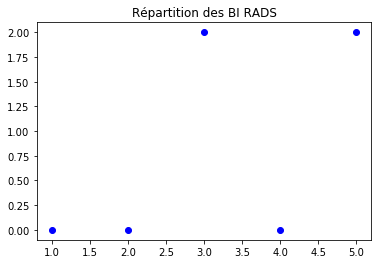

In [100]:
# Répartition des issues
print("Nombre de cas bénins : " + str(sum(data_init[5] == 0)))
print("Nombre de cas malins : " + str(sum(data_init[5] == 1)))

# Evaluations avec BI RADS
plt.figure()
plt.title("Répartition des BI RADS")
plt.plot(range(1,6), [sum(data_init[0] == str(i)) for i in range(1,6)], 'bo')

In [120]:
# Simulation de choix de medecins par lancer de piece par la classification binaire

# Classification binaire en utilisant raykar

# Autres classifications a venir sur meme modele
# Sous condition de trouver base de donnees adapte ( ou utiliser celle la comme il faut)

In [121]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def p_i(w, x):
    # w est un vecteur, x est une matrice
    w = w.reshape(-1)
    return sigmoid(w.dot(x.T))

def a_i(alpha, y):
    # Renvoie le vecteur des a_i
    # On passe par le logarithme pour calculer le produit
    log_alpha_1 = np.log(alpha)
    log_alpha_2 = np.log(1 - alpha)
    log_sum = y.dot(log_alpha_1) + (1 - y).dot(log_alpha_2)
    return np.exp(log_sum)

def b_i(beta, y):
    # Renvoie le vecteur des b_i
    # On passe par le logarithme pour calculer le produit
    log_alpha_1 = np.log(beta)
    log_alpha_2 = np.log(1 - beta)
    log_sum = y.dot(log_alpha_1) + (1 - y).dot(log_alpha_2)
    return np.exp(log_sum)

def alpha_j(mu, y):
    return mu.dot(y) / np.sum(mu)

def beta_j(mu, y):
    return (1 - mu).dot(1 - y) / np.sum(1 - mu)

def mu_i(data, w, alpha, beta, y):
    a = a_i(alpha, y)
    p = p_i(w, data)
    b = b_i(beta, y)
    numerateur = a*p
    denominateur = numerateur + b*(1-p)
    return numerateur/denominateur

In [122]:
def norme(w):
    print(np.shape(w))
    return(np.sqrt(w.dot(w)))

def grad(data, mu, w):
    p = p_i(w, data)
    return (mu - p).dot(data)

def hess(data, w):
    p = p_i(w,data)
    diag = np.diag(p * (1 - p))
    return - (data.T).dot(diag.dot(data))

def gradient_descent(grad_f, hess_f, data, mu, winit, max_iter = 1000, stop = 1e-4):
    pas = 1
    w = winit
    w_plus = 0
    i = 0
    while (i<max_iter) & (norme(w_plus-w)>stop):
        w_plus = w - pas * np.linalg.inv(hess_f(data,w)) * grad_f(data,mu,w)
        pas = 1/np.sqrt(i)
        w = w_plus
        i += 1
    return w

In [123]:
def EM_algorithm(data, labels, winit, nb_iter = 50):
    mu = np.mean(labels, axis = 1) #initilisation de mu
    w = winit #initialisation de w
    for ite in range(nb_iter):
        # M step
        alpha = alpha_j(mu, labels) #met à jour alpha
        beta = beta_j(mu, labels) #met à jour beta
        w = gradient_descent(grad, hess, data, mu, w) #met à jour w
        # E step
        mu = mu_i(data, w, alpha, beta, labels)#met à jour mu
    return w, alpha, beta, mu

In [124]:
# Simulation du choix de chaque radiologue

def doc_decide(alpha, beta, label):
    if label == 0:
        return int(rd.random() > beta)
    else:
        return int(rd.random() < alpha)
    
def choix_medecin(alphas, betas, labels):
    nb_medecin = len(alphas)
    nb_patient = len(labels)
    data = np.array([[doc_decide(alphas[j], betas[j], labels[i]) for j in range(nb_medecin) ] for i in range(nb_patient)])
    return data

In [125]:
alphas = np.array([1,0.9, 0.8, 0.57, 0.6, 0.55, 0])
betas = np.array([1,0.95, 0.85, 0.62, 0.65, 0.58, 0])

data = clean_data[0:4]
print(data)

truth = np.array(clean_data[5])
print(data)

annotations = choix_medecin(alphas, betas, truth)
n, p = np.shape(clean_data)
winit = np.ones(p)

EM_algorithm(data=data, labels=annotations, winit=winit)

[[  5.  67.   3.   5.   3.   1.]
 [  5.  58.   4.   5.   3.   1.]
 [  4.  28.   1.   1.   3.   0.]
 [  5.  57.   1.   5.   3.   1.]]
[[  5.  67.   3.   5.   3.   1.]
 [  5.  58.   4.   5.   3.   1.]
 [  4.  28.   1.   1.   3.   0.]
 [  5.  57.   1.   5.   3.   1.]]
(6,)


LinAlgError: Singular matrix

In [126]:
w = np.array([0.5, 0.2])
x = np.array([[1,0],[1,2]])

print(p_i(w,x))
print(hess(x,w))
print(hess_alt(x,w))

alphas = np.array([1,0.9, 0.8, 0.57, 0.6, 0.55, 0])
betas = np.array([1,0.95, 0.85, 0.62, 0.65, 0.58, 0])

don = np.array([i%2 for i in range(10)])
lev = np.array([i*1.0/5 for i in range(6)])
M = choix_medecin(alphas, betas, don)
M[:,1]==don
print(don)
print(M)

[ 0.62245933  0.7109495 ]
[[-0.44050402 -0.41100061]
 [-0.41100061 -0.82200123]]
[[ 0.44050402  0.41100061]
 [ 0.41100061  0.82200123]]
[0 1 0 1 0 1 0 1 0 1]
[[0 0 1 1 0 0 1]
 [1 1 0 0 0 1 0]
 [0 0 0 1 0 0 1]
 [1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1]
 [1 1 1 1 1 0 0]
 [0 0 0 0 1 0 1]
 [1 1 1 1 1 1 0]
 [0 0 0 1 0 1 1]
 [1 1 1 1 1 1 0]]
